### Autor: Mathias Cesar, colega do curso de Visão Computacional da PUC Rio, 2024

<a href="https://colab.research.google.com/github/gustavoteixeirah/dataset-celulas-malaria/blob/main/Seg_Celulas_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pydicom
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Pasta
base = r"C:/Users/NOTEMATHIAS/Desktop/Datasets/Malaria/Infected/"

imagens_png = []

# Loop
for raiz, dirs, arquivos in os.walk(base):
    for arquivo in arquivos:
        if arquivo.lower().endswith('.png'):
            caminho_arquivo = os.path.join(raiz, arquivo)
            with Image.open(caminho_arquivo) as imagem_png:
                imagens_png.append(imagem_png.copy())

(148, 142, 3)

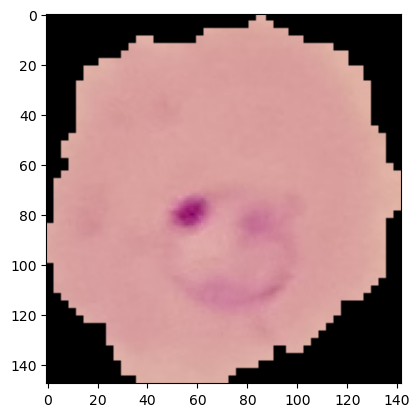

In [ ]:
primeira_imagem = np.array(imagens_png[0])
plt.imshow(primeira_imagem)
primeira_imagem.shape

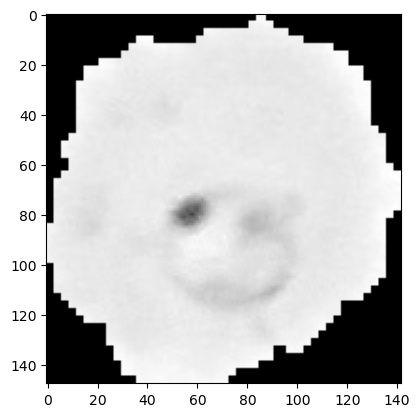

In [ ]:
#convertendo em escala de Cinza
img_cinza = cv2.cvtColor(primeira_imagem, cv2.COLOR_RGB2GRAY)
plt.imshow(img_cinza, cmap='gray');

In [ ]:
img_cinza.shape

(148, 142)

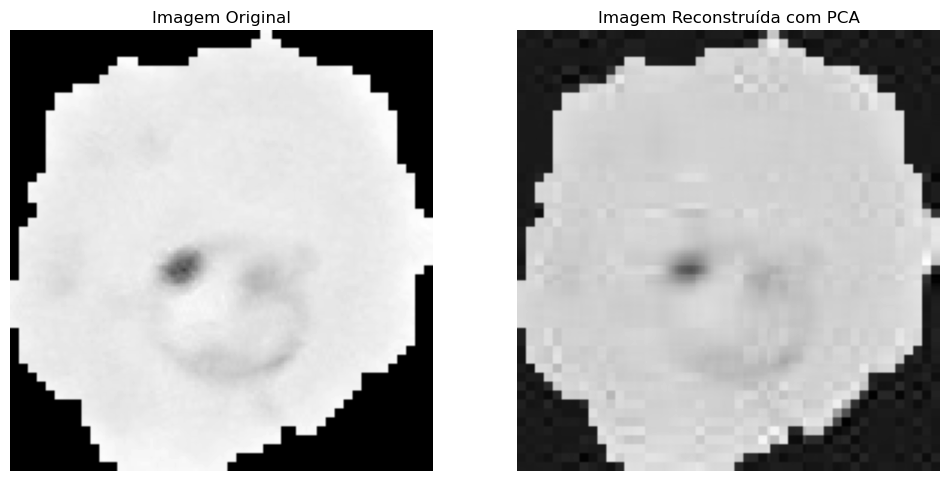

In [ ]:
# Normalizando a imagem e usando o PCA
img_nor = cv2.normalize(img_cinza, None, 0, 255, cv2.NORM_MINMAX)

# Aplica o PCA para manter, por exemplo, 99% da variância
pca = PCA(0.99, random_state=42)
imagem_pca = pca.fit_transform(img_nor)

# Reconstrói a imagem a partir dos componentes principais
img_reconstruida = pca.inverse_transform(imagem_pca)

# Plota a imagem original e a reconstruída
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(img_nor, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagem Reconstruída com PCA")
plt.imshow(img_reconstruida, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
img_nor.shape, imagem_pca.shape

((148, 142), (148, 22))

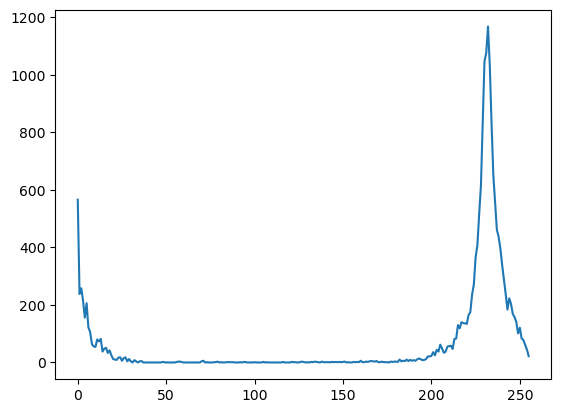

In [ ]:
histograma, bins = np.histogram(img_reconstruida , 256, [0,256])
plt.plot(histograma);

## Limiarização Binária

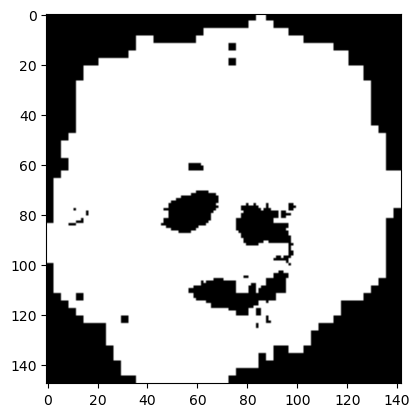

In [ ]:
valor, img = cv2.threshold(img_reconstruida , 215, 255, cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray');

## Limiarização Binária com OTSU

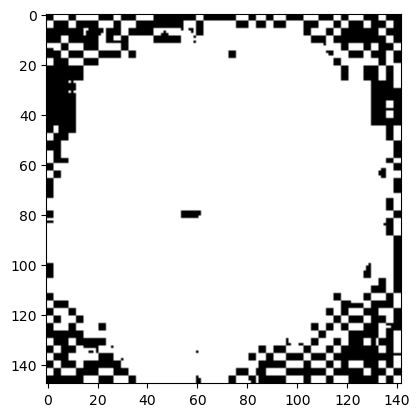

In [ ]:
img_ = np.uint8(img_reconstruida)
valor, otsu = cv2.threshold(img_, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray');

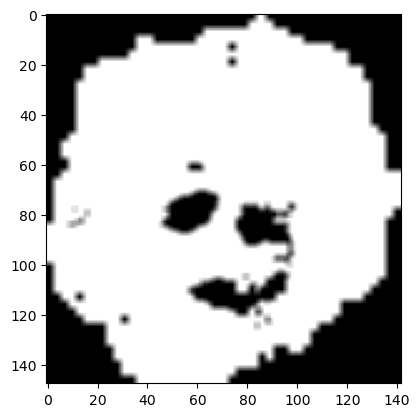

In [ ]:
desfoque = cv2.GaussianBlur(img, (3,3), 3)
plt.imshow(desfoque, cmap='gray');

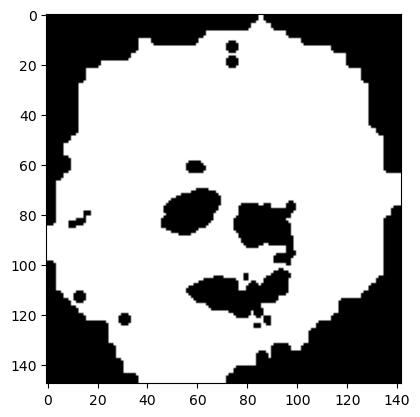

In [ ]:
valor, img_d = cv2.threshold(desfoque , 215, 255, cv2.THRESH_BINARY)
plt.imshow(img_d, cmap='gray');

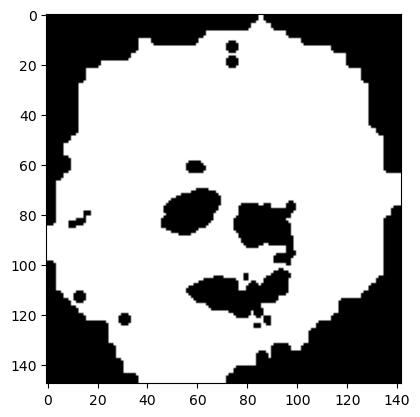

In [ ]:
img_d = np.uint8(img_d)
valor, otsu = cv2.threshold(img_d, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray');

## Limiarização Adaptativa Média

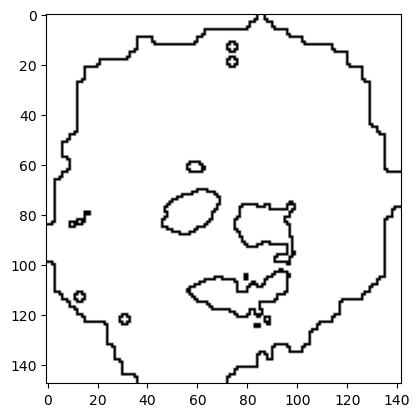

In [ ]:
adapt_media = cv2.adaptiveThreshold(otsu, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3,3)
plt.imshow(adapt_media, cmap='gray');

## Limiarização Adaptativa Gaussiana

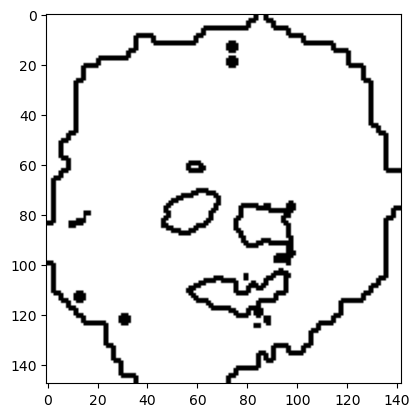

In [ ]:
adapt_gauss = cv2.adaptiveThreshold(otsu, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 3)
plt.imshow(adapt_gauss, cmap='gray');

## Operações Morfológicas Abertura

In [ ]:
kernel = np.ones((4,4), np.uint8)
kernel

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

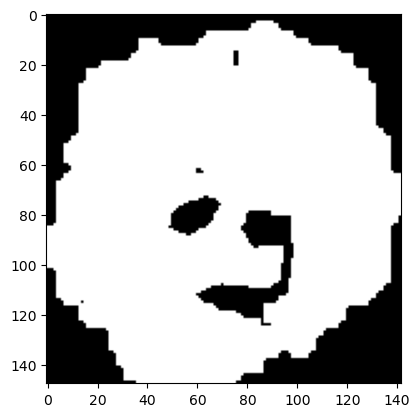

In [ ]:
erosao = cv2.erode(otsu, kernel)
dilatacao = cv2.dilate(erosao, kernel, iterations=2)
plt.imshow(dilatacao, cmap='gray');

## Operações Morfológicas Fechamento

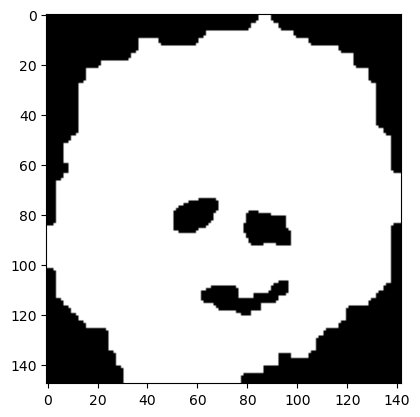

In [ ]:
dilatacao = cv2.dilate(otsu, kernel, iterations=2)
erosao = cv2.erode(dilatacao, kernel)
plt.imshow(erosao, cmap='gray');

## Detecção de Bordas Sobel

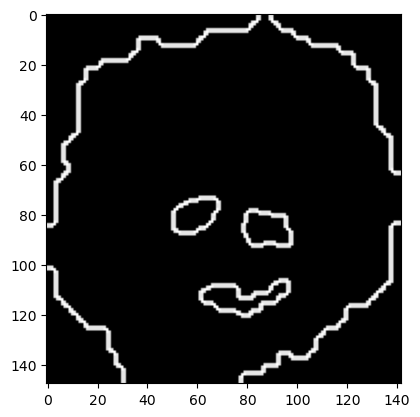

In [ ]:
# Segunda maneira de construir o SOBEL
sobelX = cv2.Sobel(erosao, cv2.CV_64F, 1, 0, ksize=1)
sobelY = cv2.Sobel(erosao, cv2.CV_64F, 0, 1, ksize=1)

sobelX = cv2.convertScaleAbs(sobelX)
sobelY = cv2.convertScaleAbs(sobelY)

sobel = cv2.addWeighted(src1 = sobelX, alpha=0.9, src2 = sobelY, beta=0.9, gamma=0)
plt.imshow(sobel, cmap='gray');

## Detecção de Bordas Canny

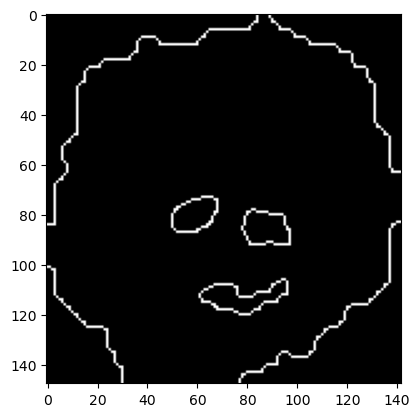

In [ ]:
canny = cv2.Canny(erosao, 9, 9)
plt.imshow(canny, cmap='gray');

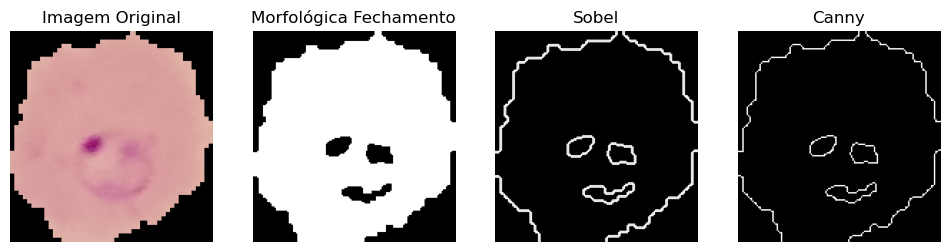

In [ ]:
# Plota a imagem original e a reconstruída
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title("Imagem Original")
plt.imshow(primeira_imagem, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Morfológica Fechamento")
plt.imshow(erosao, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Sobel")
plt.imshow(sobel, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Canny")
plt.imshow(canny, cmap='gray')
plt.axis('off')

plt.show()